#### Computer Vision - Fall 2020

**Lecturer:** Prof Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Sybmission date:** 24.11.2020


## <span style="color:blue">Exercise 1 - Driver file </span>

In this excercise you will practice basic image operation as loading, saving and displaying an image, getting familiar with 'numpy' and the benefits of vectorized operations in Python. This excercise contains 2 parts:

1. Python warmup: working with images and library functions.
2. Implementing a classic Canny Edge Detector, evaluate the results and answering open questions.

## Submission guidlines:

1. Your zip should include the following files only:
    - ex1-driver.ipynb  **Or**  ex1-driver.py 
    - ex1.py 
    - ex1_ID_ID.doc  **Or**  ex1_ID_ID.pdf
2. Ex1.py will contian your functions. 
3. The results you are asked to display and the open questions should be answered at the doc/pdf file. 
   (Don't add the python code to that file.)
4. You may use any IDE as you want (Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the file 'ex1_ID_ID.zip' and do **not** include any additional directories. 
6. Submit using *moodle*
7. Submit on time!
8. You can submit this assignment in pairs (no triplets).

## Read the following instructions carefully:
1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **Code that fail to  run will not be graded.**
5. Document your code properly.
5. Go over Basic.py and MoreOnBasic.py - you can find there relevant python functions that will make your life easier.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web, however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


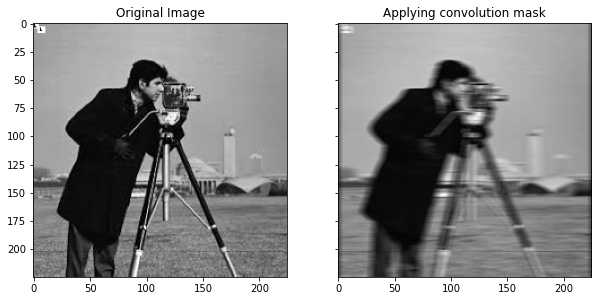

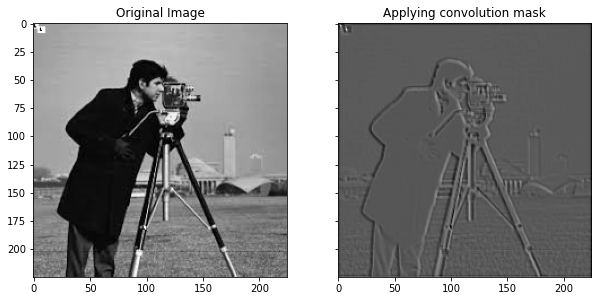

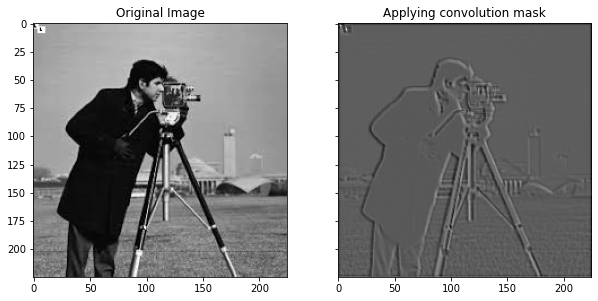

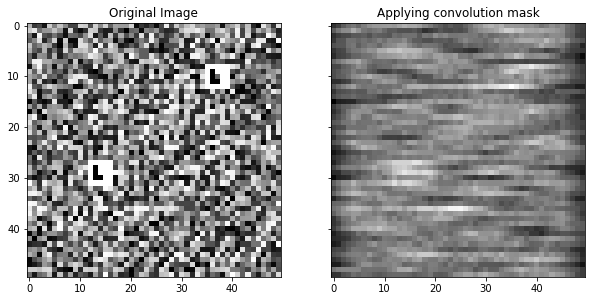

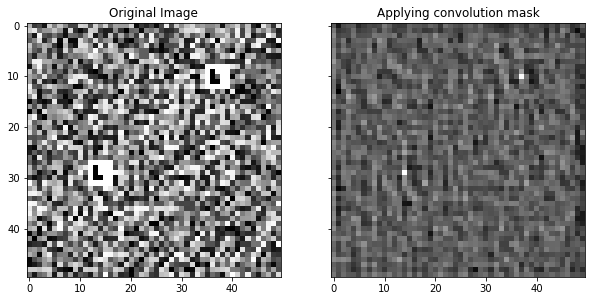

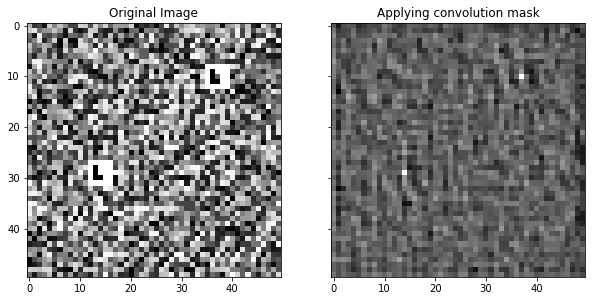

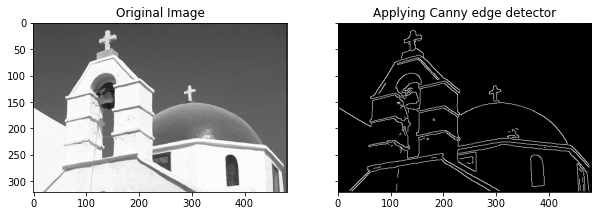

precision: 0.329
recall: 0.198
f_value : 0.247

Church.jpg,parmeters:[1.   0.05 0.13]
precision: 0.313   recall: 0.216   f_value :0.256
--------------------------------------------------
Church.jpg,parmeters:[1.   0.07 0.13]
precision: 0.322   recall: 0.215   f_value :0.258
--------------------------------------------------
Church.jpg,parmeters:[1.   0.1  0.13]
precision: 0.33   recall: 0.211   f_value :0.257
--------------------------------------------------
Church.jpg,parmeters:[2.   0.05 0.13]
precision: 0.291   recall: 0.179   f_value :0.222
--------------------------------------------------
Church.jpg,parmeters:[2.   0.07 0.13]
precision: 0.291   recall: 0.179   f_value :0.222
--------------------------------------------------
Church.jpg,parmeters:[2.   0.1  0.13]
precision: 0.296   recall: 0.179   f_value :0.223
--------------------------------------------------
Church.jpg,parmeters:[3.   0.05 0.13]
precision: 0.313   recall: 0.173   f_value :0.223
-------------------------------

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

import ex1 as ex1

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.8.3
Numpy version:  1.18.5


## Section A: Convolution (15 pt)

1. 	Suggest a convolution mask (kernel)  that computes the average of a 1×9 pixels around each pixel. 
    Write the function convolutionMaskA(img) which gets an  np.array of an image and output the convolved image with your make. 
    You may use the convolve2d function from scipy.signal. *Make sure that you understand the differences between correlation and convolution.*\
    The result's plot should contains the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in MoreOnBasic.py)
    
    
2. .Suggest a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a black  **'L'** shape region sourounded by white pixels.  Note, the rest of the image may contain any values.

    The  'L' shape region:\
    ``
    255 255 255 255 255
    255  0  255 255 255
    255  0  255 255 255
    255  0   0  255 255
    255 255 255 255 255 ``
    

3. Let '*' be a don't care value. Suggest as in 2 above a mask for the following region:\
    ``
     255 255 255 255 255
    255  0  255 255 255 
    255  0   *  255 255 
    255  0   0  255 255 
    255 255 255 255 255 ``
    
**Submit in the doc/pdf file:**  the three masks. \
**Submit in ex1.py:**  the required three functions as defined below.

**A question for thought (not for submission):**\
 What is the affect if you do not normalize the mask such that the sum of elements is one? 




In [3]:
def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convImageA = ex1.convolutionMaskA(img)
    
    convImageB = ex1.convolutionMaskB(img)
    
    convImageC = ex1.convolutionMaskC(img)
        

## Section B: Canny Edge Detector (50 pt)

In this section, you will implement the classic Canny edge detector, evaluate the results, and answer some questions. 

Reference: 
[F. J. Canny. A computational approach to edge detection. IEEE Trans. Pattern Analysis and Machine Intelligent (PAMI), 8(6):679-698, 1986.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4767851&casa_token=-KErvLLfyjQAAAAA:-Q-efDIF1sM3mJBrQfCZnqaPYftS4IspVi_9NR7kfmdx8AnFFmKSy5HnRjk2PpHpNR0VUOsw-ML4fw)


**B1.**  Write the function: *Canny('file_name', sigma, L_th, H_th)* \
Use the following steps:

1. Compute two kernels with the derivative of a Gaussian.   The parameters of the function are sigma and mask_size. \
   **Note**: The mask_size should contain 95% of the signal (coorelated to the sigma's value). \
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, *I_x* and *I_y*, with the derivatives of the image in the $x$ and in the $y$ directions, respectively.
3. Compute two matrices *G_orientation* and *G_magnitute* with the gradient orientaion and magnitute at each pixel. 

4. Compute non-maximum suppression (thining) into a matrix. \
    **Note**: For computing non-maximum suppression, edge orientation should be rounded to be one of four orientations:
    Gradients that are approximately horizontal, approximately vertical, and approximately one of the diagonals (see figure). ![](NMS-orientation.jpg)

5. Edge Tracking by Hysteresis: use the two thresholds, *L_th*, *H_th*, to put it all together and compute the canny edge detector. The output should be a binary map where an edge pixel is 1 and the rest are 0. \
**Hint**: For efficient vectorized code, you may want to use the function cv2.connectedComponents(img, connectivity=8)

[//]: # " "

**Submit in ex1.py:** the required functions as defined below.

The desire output should look like that: ![](ChurchRes.jpg)


In [4]:
# Section B

def test_B(imageName, sigma, L_th, H_th):
    
    mask_size = 8  #you should compute the mask size
    G_dx = ex1.Deriv_Gauss_x(sigma)
    G_dy = ex1.Deriv_Gauss_y(sigma)
    
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    
    Ix = ex1.Grad_x(img, G_dx)
    Iy = ex1.Grad_y(img,G_dy)
    
    G_orientation = ex1.Grad_o(Ix, Iy)
    G_magnitude = ex1.Grad_m(Ix, Iy)
    
    Et = ex1.thinning(G_magnitude, G_orientation)
    
    # now, encapsulate your code above under the function ex1.
    cannyResults = ex1.canny(img, sigma, L_th, H_th)
    
    return cannyResults



**B2**. In this part you will apply your Canny edge detector and explore its parameters 

1. Test your functions on an image you choose. Explore various parameters and choose a set such that the result  looks “good”. \
**Submit in the doc/pdf file**: display the image you choosed, its esges, and the parameters you used. 

2. Run your Canny edge detector on the three given images: \
*Church.jpg, Golf.jpg, Nuns.jpg.*

3. Explore with different sets of parameters *sigma ,L_th, H_th*.

    **Submit in the doc/pdf file**:
Give a short explanation on how each of the Canny parameters affect the results. Show for each of your observations - a pair of images that support it.


## Section C: Evaluation (35 pt)

To measure the performance of an edge-detector, it is common to compare the detection results with those chosen manually by a person. The comparison is between two sets, the set E of pixels detected as edges and the ground truth set ($GT$) of pixels selected manually. To compare two sets, it is common to use the two measures, Precision ($P$) and Recall ($R$). A masure that comboned $P$ and $R$ is the $F$ measure. The definition of the three measures are given by:

$$P = \frac{| E \cap GT\ | }{ |E|\ }, R = \frac{| E \cap GT\ | }{ |GT|\ } , F = 2\frac{PR}{P+R}$$

1. 	**Answer Theoretically**: \
    **a.** Which choice of Canny's parameters will cause P to be high?\
    **b.** Which choice of Canny's parameters will cause R to be high?
    
2. Write the function: evaluate_edges(res,GT) that output the three measures, $P$, $R$ and $F$. Make sure to handle division by zero.
    
3.	Use the given GT results (*Church_GT.bmp, Golf_GT.bmp, Nuns_GT.bmp*) on the three images, and compute the $P$, $R$, and $F$ values for a set of 27 parameters (a combination of 3 values for each parameters).\
Note: These are binary images

4. **In the doc/pdf file:** List 3 values you considered for each of the  parameters, and display the best set for each of the measure for each of the images. The tiltle should contain the parameters and the three evaluation measures.

    **A question for thought (not for submission)**\
    **a.** 	For the same image, does the same set of parameters gives best results for all the three measures (P,R,F)?\
    **b.**  For the same set of parameters, are the measures $P$, $R$ and $F$ have thes same values on all the images?


5. A $GT$ pixel may be shifted by one pixel with respect to the computed edges. Write a python function that is tolerant to such a shift\
[P,R,F]=evaluate_edges_shift_tolerant(E,E_GT).\
**Hints:** \
**a.** You can convolve the image with a mask to shift the image one pixel to a given direction.\
**b.** Another possibility is to use *cv2.dilate()* function with the kernel *np.ones((2,2))*.\
**b.** You should make sure that each pixel in $E$ that overlap a pixel in $GT$ or is a pixel away from the $GT$ is counted only once.\
**c.** You should make sure that the evaluation results are improved with respect to those obtain without the shift. 


**Submit in the doc/pdf file**: answers to 1 and 4.\
**Submit in ex1.py:** The required function as defined below.




In [5]:
# Section C

def evaluate_edgeDetector(resCanny, imageNameGT):
    imgGT = cv2.imread(imageNameGT, cv2.IMREAD_GRAYSCALE)
    [P, R, F] = ex1.evaluate_edges(resCanny, imgGT)
    print(P, R, F)
      
    [Pd, Rd, Fd] = ex1.evaluate_edges_shift_tolerant(resCanny, imgGT)
    print(Pd, Rd, Fd)

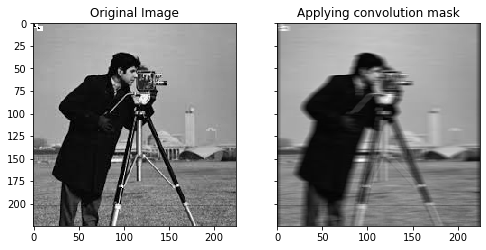

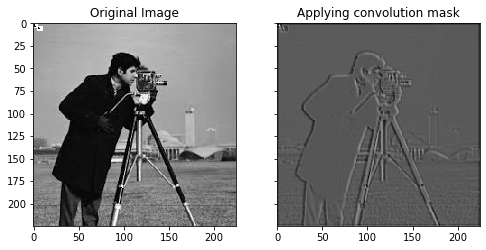

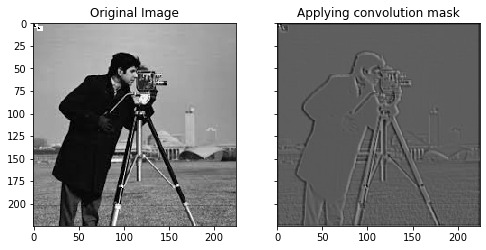

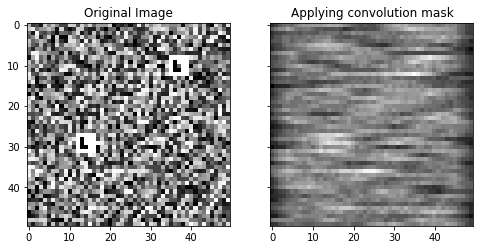

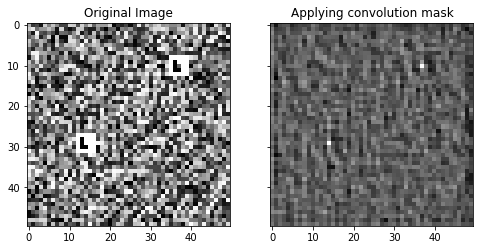

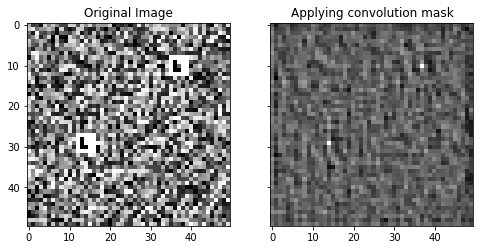

0.329 0.198 0.247
0.578 0.348 0.434


In [6]:
if __name__ == "__main__":
    #test A
    imageName = 'cameraman.jpg'
    test_A(imageName)

    synthName = 'synthCheck.tif'
    test_A(synthName)
    
    #test B
    imageName = 'Church.jpg'
    sigma, L_th, H_th  = 1.3, 0.1 , 0.15
    resultCanny = test_B(imageName,sigma, L_th, H_th)
    #test C
    imageNameGT = 'Church_GT.bmp'
    evaluate_edgeDetector(resultCanny, imageNameGT)
